<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-scripting-interface" data-toc-modified-id="Using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the scripting interface</a></span><ul class="toc-item"><li><span><a href="#Time-varying-signal" data-toc-modified-id="Time-varying-signal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Time varying signal</a></span></li><li><span><a href="#Steady-signal" data-toc-modified-id="Steady-signal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Steady signal</a></span></li></ul></li><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the function library</a></span><ul class="toc-item"><li><span><a href="#Time-varying-signal" data-toc-modified-id="Time-varying-signal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time varying signal</a></span></li><li><span><a href="#Steady-signal" data-toc-modified-id="Steady-signal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Steady signal</a></span></li></ul></li></ul></div>


# How to compute acoustic Loudness 
This tutorial explains how to use MOSQITO to compute the acoustic loudness of a signal. Two approaches are possible: scripting interface and function library. The users who just need to compute SQ metrics should preferably use the scripting interface approach. The function library approach is dedicated to users who would like to integrate MOSQITO functions in another software for instance.

## Using the scripting interface
### Time varying signal
An Audio object is first created by importing an audio file. In this example, the signal is imported from a .wav file. The tutorial [how to import a signal](./tuto_import_signal.ipynb) gives more information about the syntax of the import and the other supported file types. Check the tutorial [Audio signal basic operations](./signal_basic_operations.ipynb) to learn how to plot the time signal, compute and plot its 1/3 octave band spectrum, compute its overall level, etc.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# Import Audio class
from mosqito.classes.Audio import Audio

# Create an Audio object
woodpecker = Audio(
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav",
    calib=2 * 2 ** 0.5,
)

The acoustic loudness is computed by using the following command line. The function takes 1 input argument: "field_type" that can be set to "free" or "diffuse" depending on the environment of the audio signal recording. The Loudness is computed by using the Zwicker method (see the corresponding [documentation](../documentation/loudness-time-varying.md) for more information) 

In [2]:
woodpecker.compute_loudness(field_type="free")

The preceeding command computes the loudness of the audio signal as a function of time. Its value can be plotted with the following command. The "time" argument indicates that the loudness shall be plotted over time. The optional type_plot argument is obviously used to specifies the plot type (among "curve", "bargraph", "barchart" and "quiver"). The optional color_list argument is used to specify the color scheme used for the plots.

c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


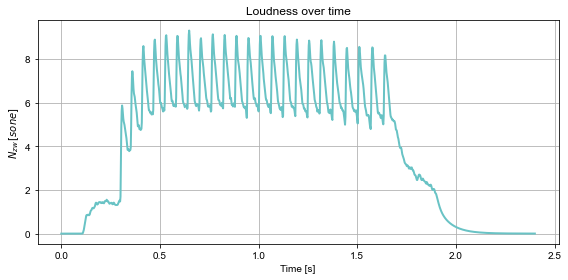

In [3]:
woodpecker.loudness_zwicker.plot_2D_Data(
    "time",
    type_plot="curve",
    color_list=COLORS,
)

The specific loudness over time and critical band rate is also computed. It can be plotted over critical band rate for a specific time or over time for a specific critical band rate with the following commands.

c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


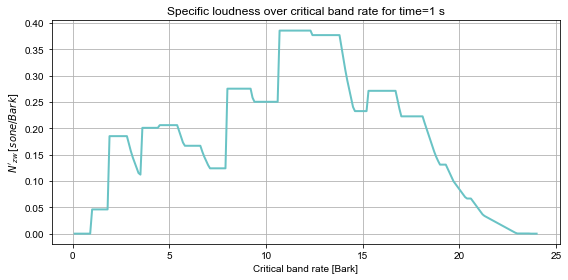

In [4]:
woodpecker.loudness_zwicker_specific.plot_2D_Data(
    "cr_band",
    "time=1",
    type_plot="curve",
    color_list=COLORS,
)

The specific Loudness can also be plotted over frequency with the following syntax:

In [5]:
woodpecker.loudness_zwicker_specific.plot_2D_Data(
    "cr_band->Hz",
    "time=1",
    is_logscale_x=True,
    x_min=40,
    type_plot="curve",
    color_list=COLORS,
)

UnitError: ERROR: Unit Bark unknown

c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


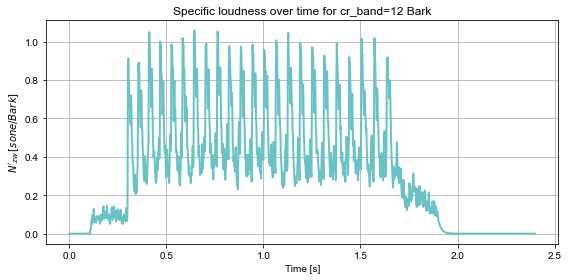

In [6]:
woodpecker.loudness_zwicker_specific.plot_2D_Data(
    "time",
    "cr_band=12",
    type_plot="curve",
    color_list=COLORS,
)

### Steady signal
For a steady signal, the syntax is almost equivalent, see below.

The loudness of the signal is N = 10.418 sone


c:\users\salomé\documents\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:339: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


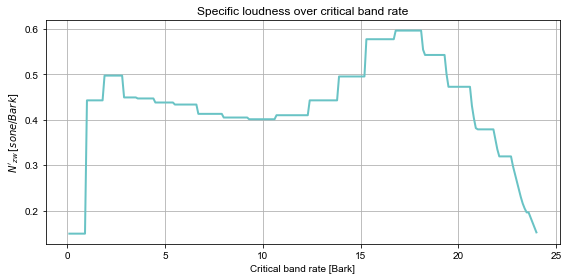

In [7]:
# Create an Audio object
pinknoise = Audio(
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Test signal 5 (pinknoise 60 dB).wav",
    calib=2 * 2 ** 0.5,
    is_stationary=True,
)

# Compute loudness (fiel_type is set to "free" by default)
pinknoise.compute_loudness()

# Output
print("The loudness of the signal is N = " + str(pinknoise.loudness_zwicker) + " sone")
pinknoise.loudness_zwicker_specific.plot_2D_Data(
    "cr_band",
    type_plot="curve",
    color_list=COLORS,
)

## Using the function library
### Time varying signal
The commands below shows how to compute the loudness of a time varying signal by directly using the functions from MOSQITO. 

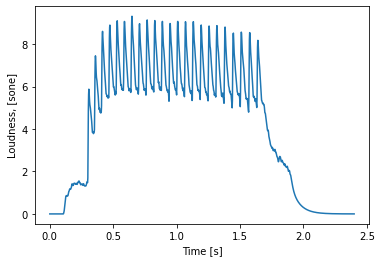

In [8]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness

# Load signal 
signal, fs = load(
    False,
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav", 
    calib = 2 * 2**0.5 
)

# Loudness calculation
loudness = comp_loudness(False, signal, fs, field_type = 'free')

# Plot
N = loudness['values']
time = np.linspace(0,0.002*(N.size - 1),N.size)
plt.plot(time, N)
plt.xlabel("Time [s]")
plt.ylabel("Loudness, [sone]")
plt.show()

### Steady signal

The syntax is very similar. The specific loudness is plotted over the Bark frequency scale.

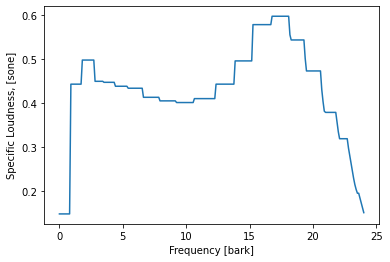

In [9]:
# Load signal 
signal, fs = load(
    True,
    "../mosqito/validations/loudness_zwicker/data/ISO_532-1/Test signal 5 (pinknoise 60 dB).wav", 
    calib = 2 * 2**0.5 
)

# Loudness calculation
loudness = comp_loudness(True, signal, fs, field_type = 'free')

# Plot
N = loudness['specific values']
bark_scale = np.linspace(0,24,num=len(N))
plt.plot(bark_scale, N)
plt.xlabel("Frequency [bark]")
plt.ylabel("Specific Loudness, [sone]")
plt.show()